In [5]:
#multivariance 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the original CSV file
file_path = 'Employee_testdata_with_performance.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

,EmployeeID,Education,JoiningYear,City,Country,Region,PaymentTier,Age,Gender,ExperienceInCurrentDomain,Performance
0,1,Bachelors,2017,Toronto,Canada,North America,3,34,Male,0,74.967142
1,2,Bachelors,2013,Pune,India,Asia,1,28,Female,3,68.617357
2,3,Bachelors,2014,New Delhi,India,Asia,3,38,Female,2,76.476885
3,4,Masters,2016,Vancouver,Canada,North America,3,27,Male,5,85.230299
4,5,Masters,2017,Berlin,Germany,Europe,3,24,Male,2,67.658466


In [3]:
import pandas as pd
import numpy as np
from numpy.random import multivariate_normal

# Load the original CSV file
file_path = 'Employee_testdata_with_performance.csv'
df = pd.read_csv(file_path)

# Set the number of samples to generate
num_samples = df.shape[0]

# Define the mean and covariance matrix for the multivariate normal distribution
mean = [5, 5, 5]  # Means for team engagement, collaboration, and flexibility
cov = [
    [1, 0.8, 0.5],  # Covariance matrix
    [0.8, 1, 0.6],
    [0.5, 0.6, 1]
]

# Generate synthetic data
synthetic_data = multivariate_normal(mean, cov, num_samples)

# Create a DataFrame for the synthetic data
synthetic_df = pd.DataFrame(synthetic_data, columns=['TeamEngagement', 'Collaboration', 'Flexibility'])

# Merge the synthetic data with the original data
df_updated = pd.concat([df, synthetic_df], axis=1)

# Save the updated DataFrame t a new CSV file
updated_file_path = 'Employee_testdata_with_synthetic_behavior_multivariance_1.csv'
df_updated.to_csv(updated_file_path, index=False)

# Display the first few rows of the updated dataframe
df_updated.head()


,EmployeeID,Education,JoiningYear,City,Country,Region,PaymentTier,Age,Gender,ExperienceInCurrentDomain,Performance,TeamEngagement,Collaboration,Flexibility
0,1,Bachelors,2017,Toronto,Canada,North America,3,34,Male,0,74.967142,4.676177,5.183682,4.723842
1,2,Bachelors,2013,Pune,India,Asia,1,28,Female,3,68.617357,6.155423,6.719888,5.723301
2,3,Bachelors,2014,New Delhi,India,Asia,3,38,Female,2,76.476885,5.528196,5.402067,5.729216
3,4,Masters,2016,Vancouver,Canada,North America,3,27,Male,5,85.230299,5.195475,4.072598,5.067008
4,5,Masters,2017,Berlin,Germany,Europe,3,24,Male,2,67.658466,4.233507,3.540209,4.783851


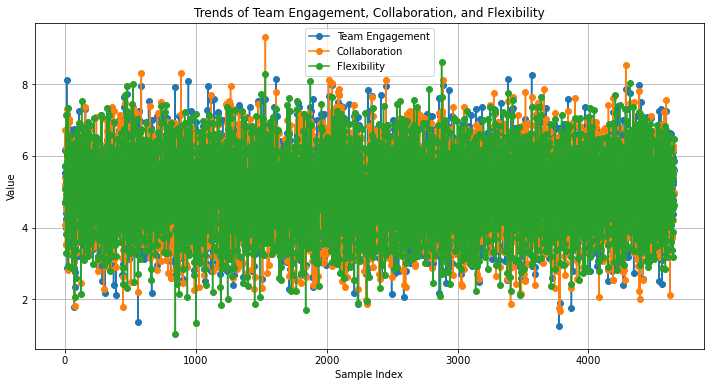

In [7]:
plt.figure(figsize=(12, 6))

# Plot lines for each variable
plt.plot(synthetic_df.index, synthetic_df['TeamEngagement'], label='Team Engagement', marker='o')
plt.plot(synthetic_df.index, synthetic_df['Collaboration'], label='Collaboration', marker='o')
plt.plot(synthetic_df.index, synthetic_df['Flexibility'], label='Flexibility', marker='o')

# Adding titles and labels
plt.title('Trends of Team Engagement, Collaboration, and Flexibility')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()


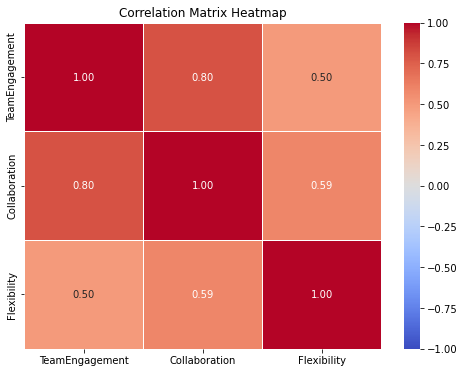

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the synthetic data
corr_matrix = synthetic_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()
